## Exercise 1 - Simple rules

First name: Brian
<br>
Last name: Schweigler
<br>
Matriculation number: 16-102-071

#### (1a) What is the best default rule for this dataset? (Default means without any evidence about the person)?

Without prior knowledge, all we know is whether a person died or not.
For this, we can test the two rules "all dead" or all "survived":

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
import scipy
from mlxtend.classifier import OneRClassifier
from mlxtend.evaluate import accuracy_score

clf = GaussianNB()
le = preprocessing.LabelEncoder()
df = pd.read_csv("data/titanic.csv", index_col='Name')
pd.set_option('display.max_colwidth', None)
print(df.head(20))
# df.describe(include='all')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
                                                        Survived  Pclass  \
Name                                                                       
Mr. Owen Harris Braund                                         0       3   
Mrs. John Bradley (Florence Briggs Thayer) Cumings             1       1   
Miss. Laina Heikkinen                                          1       3   
Mrs. Jacques Heath (Lily May Peel) Futrelle                    1       1   
Mr. William Henry Allen                                        0       3   
Mr. James Moran                                                0       3   
Mr. Timothy J McCarthy                                         0       1   
Master. Gosta Leonard Palsson                                  0       3   
Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson               1       3   
Mrs. Nicholas (Adele Achem) Nasser                             1       2   


In [11]:
survived = 0
died = 0
for index, row in df.iterrows():
    if row["Survived"] == 1:
        survived += 1
    else:
        died += 1

print("Accuracy if assuming everyone survived :", survived/(survived+died))
print("Accuracy if assuming everyone died :", died/(survived+died))

Accuracy if assuming everyone survived : 0.3855693348365276
Accuracy if assuming everyone died : 0.6144306651634723


In general, "choose most frequent to be the default rule".
In this case, assuming that everyone died is the best default rule, and we should aim to beat with our prediction approaches.


#### (1b) What is the best 1R for this dataset?
Very likely, without prior information, we can assume that due to "mothers and children first" when the titanic sank,
that those are most likely to have survived, thus gender (Sex) or if they are a parent/child.

So let's test this:

In [12]:
X_d = df[["Sex"]]
y = df["Survived"]
Xd_train, Xd_test, y_train, y_test = train_test_split(X_d, y, test_size=0.3, random_state=2)
oner = OneRClassifier()
oner.fit(Xd_train.to_numpy(), y_train)
y_pred = oner.predict(Xd_test.to_numpy())

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using outdated binary gender: ", accuracy)

X_d_fam = df[["Parents/Children Aboard"]]
y_fam = df["Survived"]
Xd_train_fam, Xd_test_fam, y_train_fam, y_test_fam = train_test_split(X_d_fam, y_fam, test_size=0.3, random_state=2)
oner_fam = OneRClassifier()
oner_fam.fit(Xd_train_fam.to_numpy(), y_train_fam)
y_pred_fam = oner_fam.predict(Xd_test_fam.to_numpy())

accuracy_fam = accuracy_score(y_test_fam, y_pred_fam)
print("Parents/Children accuracy: ", accuracy_fam)

Accuracy using outdated binary gender:  0.7865168539325843
Parents/Children accuracy:  0.5917602996254682


Thus the outdated binary gender within this dataset (M/F) is the best 1R.

#### (1c) Can you produce a second rule based on a single attribute with a good effectiveness?
For this we can simply look at all the variants:

In [ ]:
X_d_fare = df[["Fare"]]
y_fare = df["Survived"]
Xd_train_fare, Xd_test_fare, y_train_fare, y_test_fare = train_test_split(X_d_fare, y_fare, test_size=0.3, random_state=2)
oner_fare = OneRClassifier()
oner_fare.fit(Xd_train_fare.to_numpy(), y_train_fare)
y_pred_fare = oner_fare.predict(Xd_test_fare.to_numpy())
accuracy_fare = accuracy_score(y_test_fare, y_pred_fare)
print("Fare Accuracy: ", accuracy_fare)

X_d_pclass = df[["Pclass"]]
y_pclass = df["Survived"]
Xd_train_pclass, Xd_test_pclass, y_train_pclass, y_test_pclass = train_test_split(X_d_pclass, y_pclass, test_size=0.3, random_state=2)
oner_pclass = OneRClassifier()
oner_pclass.fit(Xd_train_pclass.to_numpy(), y_train_pclass)
y_pred_pclass = oner_pclass.predict(Xd_test_pclass.to_numpy())

accuracy_pclass = accuracy_score(y_test_pclass, y_pred_pclass)
print("Pclass Accuracy: ", accuracy_pclass)

X_d_age = df[["Age"]]
y_age = df["Survived"]
Xd_train_age, Xd_test_age, y_train_age, y_test_age = train_test_split(X_d_age, y_age, test_size=0.3, random_state=2)
oner_age = OneRClassifier()
oner_age.fit(Xd_train_age.to_numpy(), y_train_age)
y_pred_age = oner_age.predict(Xd_test_age.to_numpy())

accuracy_age = accuracy_score(y_test_age, y_pred_age)
print("Age accuracy: ", accuracy_age)

X_d_sib = df[["Siblings/Spouses Aboard"]]
y_sib = df["Survived"]
Xd_train_sib, Xd_test_sib, y_train_sib, y_test_sib = train_test_split(X_d_sib, y_sib, test_size=0.3, random_state=2)
oner_sib = OneRClassifier()
oner_sib.fit(Xd_train_sib.to_numpy(), y_train_sib)
y_pred_sib = oner_sib.predict(Xd_test_sib.to_numpy())

accuracy_sib = accuracy_score(y_test_sib, y_pred_sib)
print("Sibling/Spouse accuracy: ", accuracy_sib)



Thus, we can conclude that using the Pclass (or Fare which correlates with it) are the best ones.
This is likely due to the fact that those who payed more (or are in a better class) are higher up on the ship, farther away from the engines.
Thus they had more time to escape.

-------------------------------

#### (2) Use a stock / market index for daily return of the day
First we simply load the dataset

In [51]:
pd.set_option('display.max_colwidth', None)
stock_df = pd.read_csv("data/Nasdaq.csv", index_col='Date')
print(stock_df.head(10))
# stock_df['Date'] = stock_df['Date'].apply(pd.to_datetime)
stock_df.describe(include='all')

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
1971-02-05  100.000000  100.000000  100.000000  100.000000  100.000000       0
1971-02-08  100.839996  100.839996  100.839996  100.839996  100.839996       0
1971-02-09  100.760002  100.760002  100.760002  100.760002  100.760002       0
1971-02-10  100.690002  100.690002  100.690002  100.690002  100.690002       0
1971-02-11  101.449997  101.449997  101.449997  101.449997  101.449997       0
1971-02-12  102.050003  102.050003  102.050003  102.050003  102.050003       0
1971-02-16  102.190002  102.190002  102.190002  102.190002  102.190002       0
1971-02-17  101.739998  101.739998  101.739998  101.739998  101.739998       0
1971-02-18  101.419998  101.419998  101.419998  101.419998  101.419998       0
1971-02-19  100.699997  100.699997  100.699997  100.699997  100.699997       0


,Open,High,Low,Close,Adj Close,Volume
count,12402.000000,12402.000000,12402.000000,12402.000000,12402.000000,1.240200e+04
mean,2120.657774,2134.377615,2104.791436,2120.585484,2120.585484,1.042295e+09
std,2692.888884,2709.482136,2673.491669,2693.171132,2693.171132,1.145532e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,284.700012,284.857498,284.150002,284.477501,284.477501,5.035250e+07
50%,1262.969971,1268.849976,1250.440002,1259.405029,1259.405029,5.930600e+08
75%,2623.209961,2642.297607,2599.407410,2619.670044,2619.670044,1.870712e+09
max,15375.980469,15403.440430,15343.280273,15374.330078,15374.330078,1.110216e+10


Look at daily return histograms:

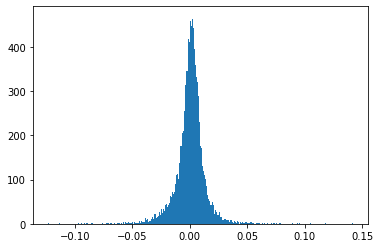

In [52]:
daily_return = np.empty(stock_df['Close'].shape)
#  From Slides: Daily return (r): Difference in percentage between the price at time t+1 and at time t
daily_return[1:] = np.ediff1d(stock_df['Close']) / stock_df['Close'][:-1]
stock_df.insert(loc=len(stock_df.columns), column='Daily Return', value=daily_return)

bins = int(len(daily_return) / 32)
plt.hist(daily_return, bins=bins)
plt.show()

An approach to compare binary and ternary solution.

In [53]:
binary = (daily_return > 0).astype(float)
stock_df.insert(loc=len(stock_df.columns), column='Binary Decision', value=binary)

limit = 0.001
ternary = np.zeros(daily_return.shape)
ternary[np.where(daily_return > limit)] = 2
ternary[np.where(daily_return < limit)] = 1
stock_df.insert(loc=len(stock_df.columns), column='Ternary Decision', value=ternary)

print(stock_df.head(20))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1971-02-05  100.000000  100.000000  100.000000  100.000000  100.000000   
1971-02-08  100.839996  100.839996  100.839996  100.839996  100.839996   
1971-02-09  100.760002  100.760002  100.760002  100.760002  100.760002   
1971-02-10  100.690002  100.690002  100.690002  100.690002  100.690002   
1971-02-11  101.449997  101.449997  101.449997  101.449997  101.449997   
1971-02-12  102.050003  102.050003  102.050003  102.050003  102.050003   
1971-02-16  102.190002  102.190002  102.190002  102.190002  102.190002   
1971-02-17  101.739998  101.739998  101.739998  101.739998  101.739998   
1971-02-18  101.419998  101.419998  101.419998  101.419998  101.419998   
1971-02-19  100.699997  100.699997  100.699997  100.699997  100.699997   
1971-02-22   99.680000   99.680000   99.680000   99.680000   99.680000   
1971-02-23   99.720001   99.720001   9

Create 1R model using volume:

In [59]:
X_d_stock = stock_df[["Volume"]]
y_stock = stock_df["Binary Decision"]
print("Length of DF: ", df.shape[0])
test_size = 100/df.shape[0]
print("Percentage of test_size to use last 100 days: ", test_size)
Xd_train_stock, Xd_test_stock, y_train_stock, y_test_stock = train_test_split(X_d_stock, y_stock, test_size=test_size, random_state=2, shuffle=False)
oner_stock = OneRClassifier()
oner_stock.fit(Xd_train_stock.to_numpy(), y_train_stock)
y_pred_stock = oner_stock.predict(Xd_test_stock.to_numpy())
accuracy_stock_bi = accuracy_score(y_test_stock, y_pred_stock)
print("Binary Accuracy: ", accuracy_stock_bi)

# As ternary does not play nicely with OneR, using binary only
# X_d_stock_ter = stock_df[["Volume"]]
# y_stock_ter = stock_df["Ternary Decision"]
# Xd_train_stock_ter, Xd_test_stock_ter, y_train_stock_ter, y_test_stock_ter = train_test_split(X_d_stock_ter, y_stock_ter, test_size=0.3)
# oner_stock_ter = OneRClassifier()
# oner_stock_ter.fit(Xd_train_stock_ter.to_numpy(), y_train_stock_ter)
# y_pred_stock_ter = oner_stock_ter.predict(Xd_test_stock_ter.to_numpy())
# accuracy_stock_ter = accuracy_score(y_test_stock_ter, y_pred_stock_ter)
# print("Ternary Accuracy: ", accuracy_stock_ter)

Length of DF:  887
Percentage of test_size to use last 100 days:  0.11273957158962795
Binary Accuracy:  0.4267333809864189
